In [17]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# import gym
# env = gym.make("LunarLander-v2", render_mode="human")
# env.action_space.seed(42)

# observation, info = env.reset(seed=42)

# for _ in range(1000):
#     observation, reward, terminated, truncated, info = env.step(env.action_space.sample())

#     if terminated or truncated:
#         observation, info = env.reset()

# env.close()

2024-12-30 19:46:54.918 python[23644:1299094] +[IMKClient subclass]: chose IMKClient_Modern
2024-12-30 19:46:54.918 python[23644:1299094] +[IMKInputSession subclass]: chose IMKInputSession_Modern
/opt/anaconda3/envs/nut/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [18]:
env = gym.make('CartPole-v1')
states = env.observation_space.shape[0]
actions = env.action_space.n
actions

2

In [15]:
scoress = []
episodes = 100
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    while not done:
        env.render()
        action = np.random.choice([0,1])
        n_state, reward, done, trunc, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scoress.append(score)

Episode:1 Score:17.0
Episode:2 Score:40.0
Episode:3 Score:17.0
Episode:4 Score:39.0
Episode:5 Score:76.0
Episode:6 Score:39.0
Episode:7 Score:12.0
Episode:8 Score:13.0
Episode:9 Score:22.0
Episode:10 Score:16.0
Episode:11 Score:23.0
Episode:12 Score:25.0
Episode:13 Score:36.0
Episode:14 Score:13.0
Episode:15 Score:29.0
Episode:16 Score:19.0
Episode:17 Score:12.0
Episode:18 Score:9.0
Episode:19 Score:18.0
Episode:20 Score:45.0
Episode:21 Score:28.0
Episode:22 Score:23.0
Episode:23 Score:10.0
Episode:24 Score:14.0
Episode:25 Score:17.0
Episode:26 Score:29.0
Episode:27 Score:37.0
Episode:28 Score:17.0
Episode:29 Score:29.0
Episode:30 Score:63.0
Episode:31 Score:14.0
Episode:32 Score:18.0
Episode:33 Score:18.0
Episode:34 Score:18.0
Episode:35 Score:51.0
Episode:36 Score:14.0
Episode:37 Score:25.0
Episode:38 Score:15.0
Episode:39 Score:10.0
Episode:40 Score:14.0
Episode:41 Score:17.0
Episode:42 Score:12.0
Episode:43 Score:16.0
Episode:44 Score:14.0
Episode:45 Score:11.0
Episode:46 Score:28.

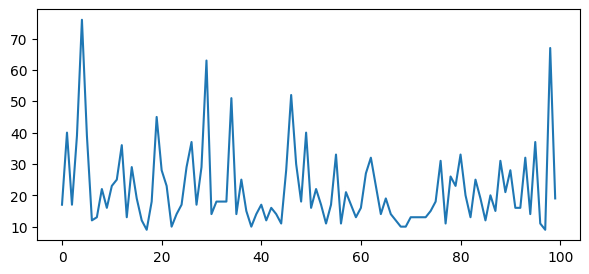

In [28]:
plt.plot(range(episode), scoress)
plt.rcParams["figure.figsize"] = (7, 5)
plt.show()

In [ ]:
def classification(states, actions):
    model = Sequential()
    model.add(Flatten(input_shape=(1,states)))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(24, activation='relu'))
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:
scoress = []
episodes = 100
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    while not done:
        env.render()
        action = np.random.choice([0,1])
        n_state, reward, done, trunc, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
    scoress.append(score)

In [32]:
env.action_space.n

2

In [40]:
env.observation_space.shape[0]

4

In [ ]:
#we iterate over episodes
for e in range(n_episodes):
    #we initialize the first state of the episode
    current_state = env.reset()
    done = False
    
    #sum the rewards that the agent gets from the environment
    total_episode_reward = 0
    
    for i in range(max_iter_episode): 
        # we sample a float from a uniform distribution over 0 and 1
        # if the sampled flaot is less than the exploration proba
        #     the agent selects arandom action
        # else
        #     he exploits his knowledge using the bellman equation 
        
        if np.random.uniform(0,1) < exploration_proba:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q_table[current_state,:])
        
        # The environment runs the chosen action and returns
        # the next state, a reward and true if the epiosed is ended.
        next_state, reward, done, _ = env.step(action)
        
        # We update our Q-table using the Q-learning iteration
        Q_table[current_state, action] = (1-lr) * Q_table[current_state, action] +lr*(reward + gamma*max(Q_table[next_state,:]))
        total_episode_reward = total_episode_reward + reward
        # If the episode is finished, we leave the for loop
        if done:
            break
        current_state = next_state
    #We update the exploration proba using exponential decay formula 
    exploration_proba = max(min_exploration_proba, np.exp(-exploration_decreasing_decay*e))
    rewards_per_episode.append(total_episode_reward)


In [30]:
def Building_Agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=10, target_model_update=1e-2)
    return dqn

In [ ]:
# Define the environment
n_states = 16  # Number of states in the grid world
n_actions = 4  # Number of possible actions (up, down, left, right)
goal_state = 15  # Goal state

# Initialize Q-table with zeros
Q_table = np.zeros((n_states, n_actions))

In [ ]:
# Define parameters
learning_rate = 0.8
discount_factor = 0.95
exploration_prob = 0.2
epochs = 1000

In [ ]:
# Q-learning algorithm
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)  # Start from a random state

    while current_state != goal_state:
        # Choose action with epsilon-greedy strategy
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)  # Explore
        else:
            action = np.argmax(Q_table[current_state])  # Exploit

        # Simulate the environment (move to the next state)
        # For simplicity, move to the next state
        next_state = (current_state + 1) % n_states

        # Define a simple reward function (1 if the goal state is reached, 0 otherwise)
        reward = 1 if next_state == goal_state else 0

        # Update Q-value using the Q-learning update rule
        Q_table[current_state, action] += learning_rate * \
            (reward + discount_factor *
             np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state  # Move to the next state


In [ ]:
# After training, the Q-table represents the learned Q-values
print("Learned Q-table:")
print(Q_table)